<a href="https://colab.research.google.com/github/allyssonendo/Soulcode-PANDAS/blob/main/PANDAS_Aula01(Atividade_depsp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação 



In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

##Importando bibliotecas


In [3]:
import pandas as pd
import pandera as pa
import numpy as np
import os
from google.cloud import storage

##Conectando com o  Bucket

In [4]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)
#Carrega o token para o ambiente de serviço
serviceAccount = '/content/erudite-store-377820-f099033ba55b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [5]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('allyssonendo01')
bucket.blob('depsp.csv')
path = 'gs://allyssonendo01/brutos/depsp.csv'

##Extraindo os dados

In [6]:
df = pd.read_csv(path)

<ipython-input-6-7b06c29b8c94>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


##Pré Análise

In [7]:
#mostra quais colunas possuem valores NaN (CNPJ = 10967)
df.isna().sum()

Ano               0
Matricula         0
Mes               0
Valor             0
CNPJ          10967
Deputado          0
Tipo              0
Fornecedor        0
dtype: int64

In [8]:
#Tipos de dados que cada coluna possui
df.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [9]:
df.groupby(['Ano'],dropna=False).size().sort_values(ascending=False)

Ano
2007    33202
2005    31894
2003    31173
2006    30928
2009    30421
2008    30155
2002    29586
2004    29338
2013    27928
2011    25152
2012    24964
2017    24820
2010    24266
2016    24141
2014    23333
2015    23171
2018    23104
2022    21564
2021    18981
2019    18849
2020    14039
2023     1386
dtype: int64

In [10]:
#Lista dados unicos de fornecedor (Varios dados repetidos com nomes diferentes que devem ser tratados)
sorted(pd.unique(df['Fornecedor']))

['" A COMADRE LANCHONETE E RESTAURANTE" PEDRO VILLELA  VILHENA - ME.',
 '" VÓ MAPHALDA "  SALADA GRILL',
 '"A TRIBUNA" DE SANTOS JORNAL E EDITORA LTDA',
 '"A VARANDA" - JOSÉ ROBERTO GERALDO - ME',
 '"ESTÂNCIA SERVIÇOS ALIMENTARES" - IVONE MEIRA DA SILVA - ME',
 '"MEGA PARK " ESTACIONAMENTO',
 '"O BRASEIRO" GALETO NA BRASA LTDA',
 '"O BRAZEIRO" GALETO NA BRASA LTDA',
 '"O REI DOS ENVELOPES" GRAF. COMERCIAL E DISTRIBUIDORA LTDA.',
 '"POSTO SÃO SEBASTIÃO" - AUTO POSTO CESTO GARCIA LTDA',
 "'FATOR GRAFICO GRAFICA E EDITORA LTDA -ME",
 "'FREIRE VEÍCULOS",
 '(POSTO MENEGUETTI) AUTO POSTO JOTAVE LTDA',
 ',ARIA HELENA GOMES RESTAURANTE ME',
 ',ARIA JULIA BARNABE BARBOZA - ME',
 ',AUTO POSTO CENTER LESTE LTDA',
 ',AUTO POSTO ITAPURA',
 ',FENIX AUTO POSTO DE SERVIÇOS LTDA',
 ',ODELO PAPELARIA E LIVRARIA LTDA',
 ',POSTO DE SERVIÇOS MARIANA LTDA',
 ",POSTO DE SERVIÇOS PAP'S ENSEADA LTDA",
 ',RONER PIRES NUNES - ME',
 '-AUTO POSTO MOEMA DA FRONTEIRA LTDA',
 '.K.F. COMÉRCIO DE ALIMENTOS LTDA',
 ".MC

##Análise dos gastos dos deputados

<Axes: xlabel='Deputado'>

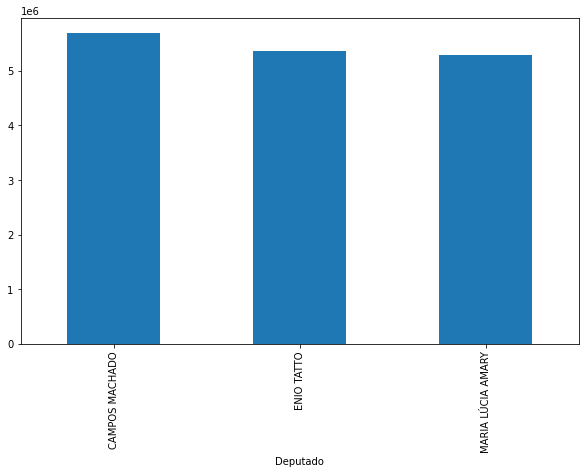

In [11]:
#Deputados que mais gastaram (CAMPOS MACHADO/ENIO TATTO/MARIA LÚCIA AMARY)
df.groupby('Deputado')['Valor'].sum().sort_values(ascending = False).head(3).plot.bar(figsize=(10,6))


<Axes: xlabel='Deputado'>

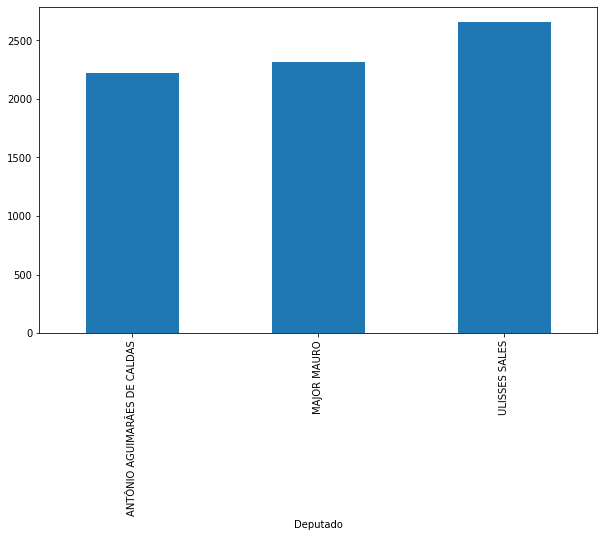

In [12]:
#Deputados que menos gastaram (ANTÔNIO AGUIMARÃES DE CALDAS(2225.63) / MAJOR MAURO (2311.53) / ULISSES SALES(2653.53))
df.groupby('Deputado')['Valor'].sum().sort_values(ascending = True).head(3).plot.bar(figsize=(10,6))

In [13]:
#Criando filtro com 4 anos e inserindo ele no dfteste
ft_ano = (df.Ano >= 2020) & (df.Ano <= 2023)
dfteste = df.loc[ft_ano]

In [14]:
#Gastos dos deputados nos ultimos 4 anos
dfteste.groupby('Deputado')['Valor'].sum().sort_values(ascending = False)

Deputado
VINÍCIUS CAMARINHA             1263959.28
ENIO TATTO                     1205046.24
PAULO FIORILO                  1199206.38
MARTA COSTA                    1193877.12
AGENTE FEDERAL DANILO BALAS    1181595.44
                                  ...    
AFONSO LOBATO                    68000.04
DANIEL JOSÉ                      52716.09
RAUL MARCELO                     36955.72
ALESSANDRA MONTEIRO              13988.77
JANAINA PASCHOAL                 13080.74
Name: Valor, Length: 101, dtype: float64

In [15]:
#Tipos onde aconteceram os maiores gastos
dfteste.groupby('Tipo')['Valor'].sum().sort_values(ascending = False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           12358372.38
O - LOCAÇÃO DE VEÍCULO                                                10032134.38
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     9361043.86
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       6634090.03
K - LOCAÇÃO DE BENS MÓVEIS                                             5994055.06
A - COMBUSTÍVEIS E LUBRIFICANTES                                       5182740.34
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          2984804.38
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       2774555.79
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              2750755.02
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2100772.47
J - SERVIÇOS DE COMUNICAÇÃO                                            1954010.38
N - MORADIA                                                            1681115.46
P - DIVULGA

In [16]:
dfteste.groupby('Fornecedor')['Valor'].sum().sort_values(ascending = False)

Fornecedor
UNIDAS VEÍCULOS ESPECIAIS S.A.             3664253.77
NEVADA RENT A CAR LTDA                     1389989.98
QUATTROPORTO CONS E NEGOCIOS LTDA           686381.20
NOGUEIRA E NOGUEIRA JUNIOR LTDA             674575.00
MARCOS CARVALHO ELIAS                       539169.39
                                              ...    
VL E IRMÃO AUTO POSTO AVENIDA LTDA               3.66
PANIF CONF REI DO VALE LTDA                      3.50
ECT. EMP BRAS. DE CORREIOS E TELEGRAFOS          2.85
CONC. DO RODOANEL OESTE DE SP S/A                2.20
AUTO POSTO MARINER DE RIBEIRÃO                   0.03
Name: Valor, Length: 9896, dtype: float64

<Axes: xlabel='Ano'>

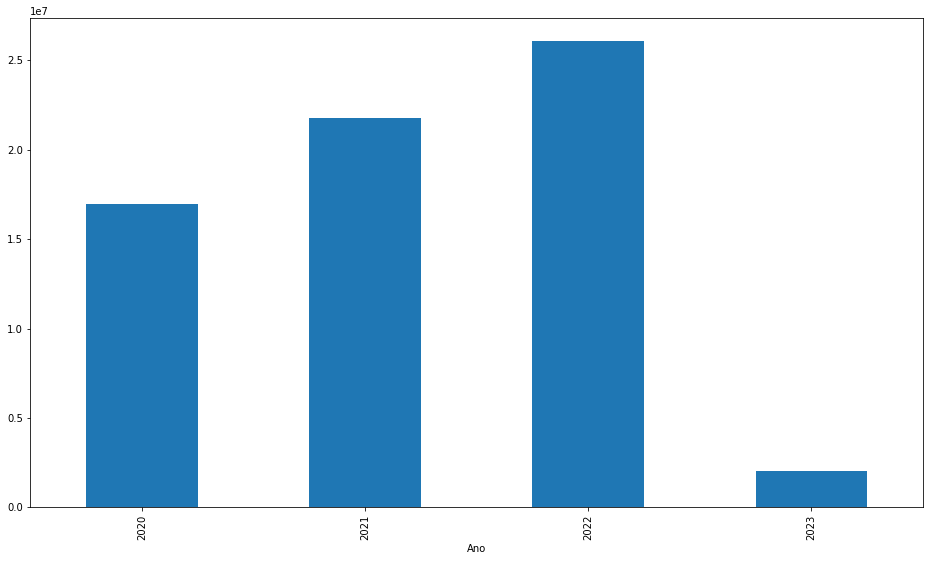

In [17]:
#Evolução dos gastos durante 2020 a 2023
dfteste.groupby('Ano')['Valor'].sum().plot.bar(figsize=(16,9))

In [18]:
df.groupby(['Deputado','Ano']).size()

Deputado            Ano 
ABELARDO CAMARINHA  2015     57
                    2016     83
                    2017     84
                    2018     69
                    2019     14
                           ... 
ÍTALO CARDOSO       2003    395
                    2004    473
                    2005    364
                    2006    408
                    2007     75
Length: 2323, dtype: int64